In [61]:
model.intercept_

-9.776372440484238e-07

In [17]:
y_train_pred

array([ 1.67206452e+01,  7.55382669e+00,  6.35533765e+00,  1.36942633e+01,
        5.28861002e+00,  4.36117718e+00,  5.80509021e+00,  1.46457190e+01,
        8.20106365e+00,  6.93846815e+00,  1.56522153e+01,  4.80693431e+00,
       -9.77637244e-07,  1.27920219e+01,  1.03367285e+01])

model.intercept_ missing

In [60]:
coeffs[0]

0.7652601155733102

In [62]:
f"Y = {model.intercept_:.4f}X"

'Y = -0.0000X'

Polynomial degree: 1, Train MSE: 4.5090, Test MSE: 5.9933
Y = -4.26592 + 0.4133X
Polynomial degree: 2, Train MSE: 0.0137, Test MSE: 0.0792
Y = 0.03157 + -0.1836X + 0.01317572X^2
Polynomial degree: 3, Train MSE: 0.0011, Test MSE: 0.0024
Y = -0.00037 + -0.0009X + 0.00257551X^2 + 0.00015049X^3
Polynomial degree: 4, Train MSE: 0.0010, Test MSE: 0.0032
Y = 0.00005 + -0.1120X + 0.01244287X^2 + -0.00013763X^3 + 0.00000277X^4
Polynomial degree: 5, Train MSE: 0.0009, Test MSE: 0.0077
Y = -0.00000 + 0.7653X + -0.09154462X^2 + 0.00443509X^3 + -0.00008566X^4 + 0.00000063X^5


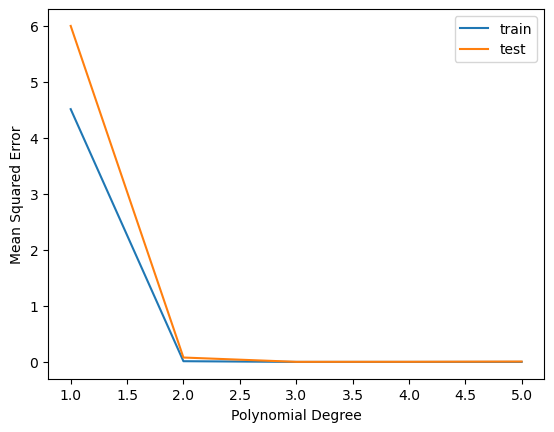

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("ahu11.csv")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.3, random_state=0)
X = df['X'].values

# Create a list of polynomial degrees to try
degrees = [1, 2, 3, 4, 5]

# Create empty lists to store the mean squared errors
train_errors = []
test_errors = []

# Create a dictionary to store the polynomial equations and predicted Y values for each degree
poly_eq_dict = {'X': df['X'].values,
                'real_Y': df['Y'].values}

# Loop over the degrees and fit a polynomial regression model for each degree
for degree in degrees:
    # Create polynomial features
    poly_transform = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_transform.fit_transform(X_train.values.reshape(-1, 1))
    X_poly_test = poly_transform.transform(X_test.values.reshape(-1, 1))

    # Fit a linear regression model
    model = LinearRegression().fit(X_poly_train, y_train)

    # Evaluate the model on the training set
    y_train_pred = model.predict(X_poly_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Evaluate the model on the test set
    y_test_pred = model.predict(X_poly_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

    # Print the MSE for the current model
    print(f"Polynomial degree: {degree}, Train MSE: {train_error:.4f}, Test MSE: {test_error:.4f}")

    # Print the polynomial equation for the current model
    coeffs = model.coef_
    eqn = f"Y = {model.intercept_:.5f} + {coeffs[0]:.4f}X"
    for i in range(1, len(coeffs)):
        eqn += f" + {coeffs[i]:.8f}X^{i+1}"
    print(eqn)
    
    poly_eq_dict[f"Degree_{degree}_Y"] = model.predict(poly_transform.fit_transform(df['X'].values.reshape(-1, 1)))
# Plot the MSEs for each polynomial degree
import matplotlib.pyplot as plt
plt.plot(degrees, train_errors, label='train')
plt.plot(degrees, test_errors, label='test')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [49]:
f"Y = {coeffs[0]:.4f}"

'Y = 0.4133'

In [54]:
{intercept:.4f}

SyntaxError: invalid syntax (375154652.py, line 1)

In [45]:
poly_df = pd.DataFrame.from_dict(poly_eq_dict)
poly_df = poly_df.round(decimals=3)
poly_df

,X,real_Y,Degree_1_Y,Degree_2_Y,Degree_3_Y,Degree_4_Y,Degree_5_Y
0,0,0.000,-4.266,0.032,-0.000,0.000,-0.000
1,25,3.984,6.066,3.678,3.938,3.907,3.952
2,26,4.351,6.480,4.166,4.363,4.345,4.361
3,27,4.809,6.893,4.681,4.815,4.809,4.807
4,28,5.324,7.306,5.222,5.297,5.299,5.289
5,29,5.796,7.720,5.789,5.810,5.817,5.805
6,30,6.320,8.133,6.383,6.354,6.364,6.355
7,31,6.961,8.546,7.003,6.930,6.941,6.938
8,32,7.544,8.959,7.650,7.540,7.549,7.554
9,33,8.185,9.373,8.323,8.183,8.190,8.201


In [42]:
poly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           22 non-null     int64  
 1   real_Y      22 non-null     float64
 2   Degree_1_Y  22 non-null     float64
 3   Degree_2_Y  22 non-null     float64
 4   Degree_3_Y  22 non-null     float64
 5   Degree_4_Y  22 non-null     float64
 6   Degree_5_Y  22 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.3 KB
